<a href="https://colab.research.google.com/github/Ryanzaufa/DataScienceSC/blob/main/03_Fire_Ryanza_Aufa_Yansa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['MaritalDesc', 'Sex', 'Salary']) #Memilih kolom yang dibutuhkan
df.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary = ('Salary', np.min), #Mencari nilai minimal pada data Salary
    median_salary = ('Salary', np.median), #Mencari nilai median pada data Salary
    max_salary = ('Salary', np.max), #Mencari nilai maximal pada data Salary
    average_salary = ('Salary', np.mean) #Mencari nilai minimal pada data Salary
) #Mengelompokkan grup berdasarkan kolom Married Description and Gender

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['TermReason', 'Employee_Name'])

df1 = df.groupby('TermReason').agg(
    total_termination = pd.NamedAgg('Employee_Name', aggfunc = "count")

)
df1.sort_values(by = ['total_termination'], ascending = False).head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['PerformanceScore', 'Employee_Name','RecruitmentSource'])
df1 = df.loc[df['PerformanceScore'] == "Exceeds"]
df2 = df1.groupby('RecruitmentSource').agg(
    total_recruit = pd.NamedAgg('PerformanceScore', aggfunc = "count")
)
df2.sort_values(by = ['total_recruit'], ascending = False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Department', 'ManagerName'])#Memilih kolom yang dibutuhkan

df.groupby('Department').agg(
    ManagerName = pd.NamedAgg('ManagerName', aggfunc='nunique')
)

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here Termd
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Sex', 'Termd'])

df.groupby(['Sex']).value_counts(normalize = True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
dtype: float64

# Create an EDA and Data Visualization Question

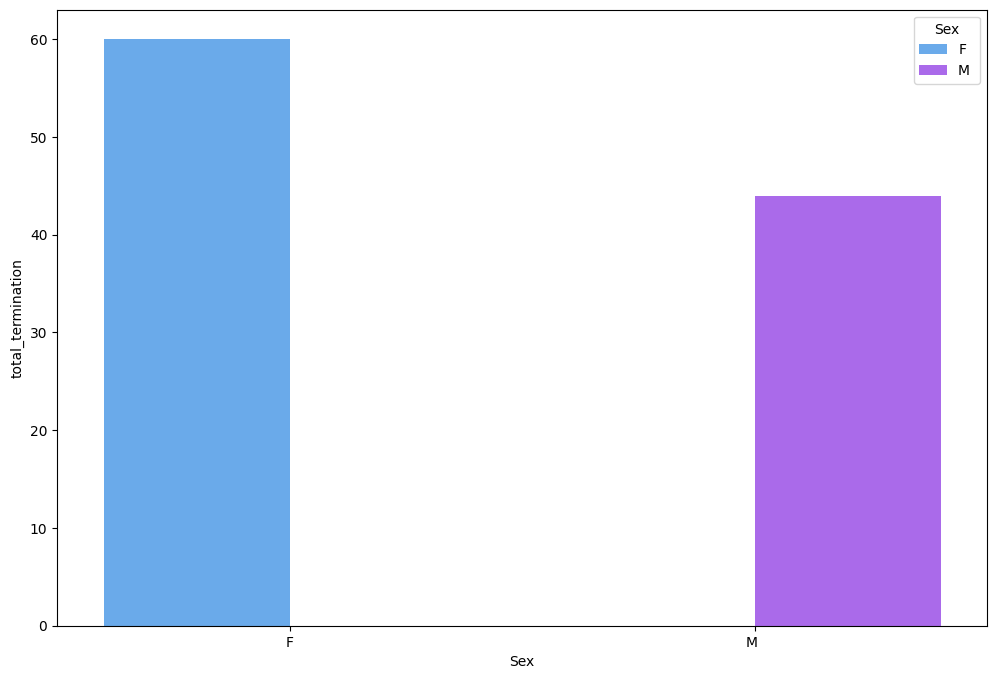

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Sex', 'Termd'])
term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

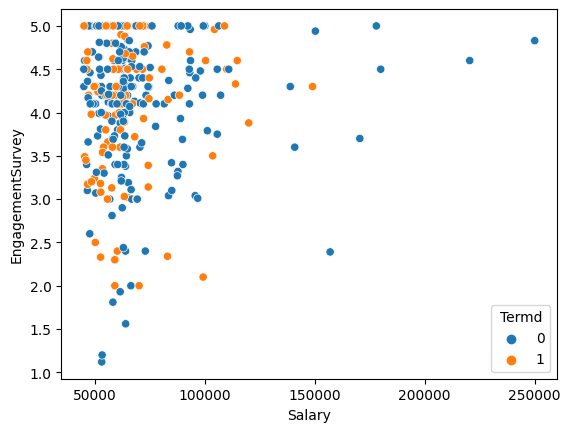

In [ ]:
#code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Salary', 'EngagementSurvey', 'Termd']) #Memilih kolom yang dibutuhkan
f, ax = plt.subplots()

ax = sns.scatterplot(x='Salary', y = 'EngagementSurvey', hue = 'Termd', data = df)

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

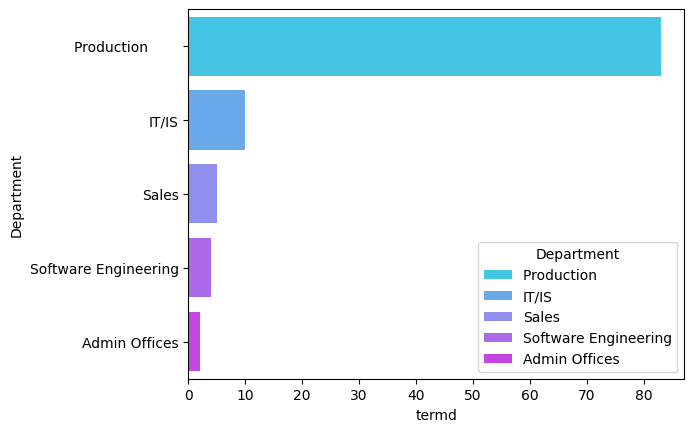

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Department', 'Termd']) #Memilih kolom yang dibutuhkan
df1 = df.loc[df['Termd'] == 1]
term = df1.groupby('Department').agg(
    termd = pd.NamedAgg('Termd', aggfunc = 'count')
).reset_index().sort_values('termd', ascending = False)

f, ax = plt.subplots(1,1)
ax = sns.barplot(x='termd', y = 'Department', hue = 'Department', data = term, palette='cool', dodge = False)


8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

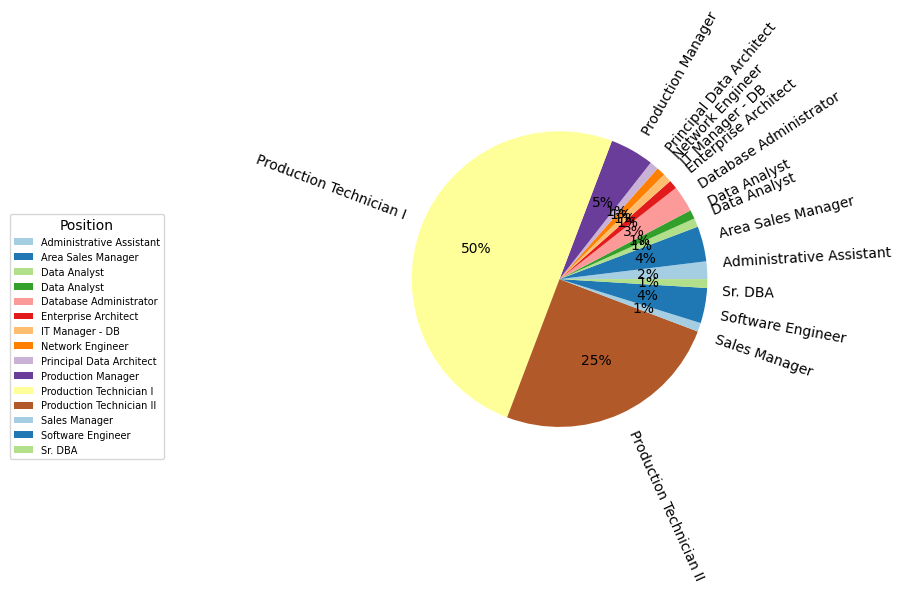

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Position', 'Termd']) #Memilih kolom yang dibutuhkan
df1 = df.loc[df['Termd'] == 1]
df2 = df1.groupby('Position').agg(
    termd = pd.NamedAgg('Termd', aggfunc='sum')
).reset_index()

pallete_colors = sns.color_palette("Paired")
plt.pie(df2["termd"], labels=df2["Position"], colors=pallete_colors, autopct = '%1.0f%%', rotatelabels = True)
plt.legend( title="Position", loc = "lower left", fontsize = "7", bbox_to_anchor=(-1, 0))

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

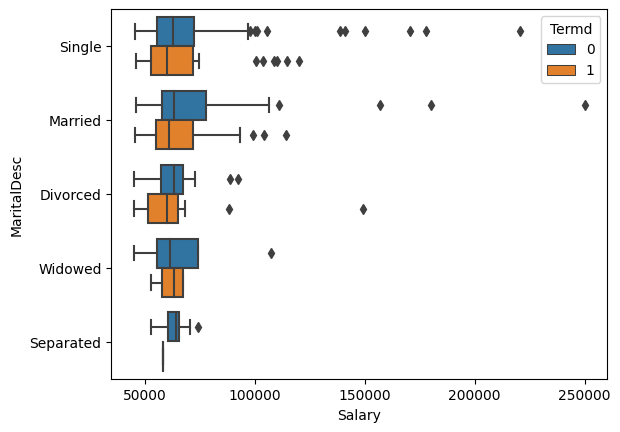

In [ ]:
#code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['MaritalDesc', 'Salary', 'Termd']) #Memilih kolom yang dibutuhkan

f, ax = plt.subplots()
ax = sns.boxplot(x='Salary', y = 'MaritalDesc', hue = 'Termd', data = df)

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

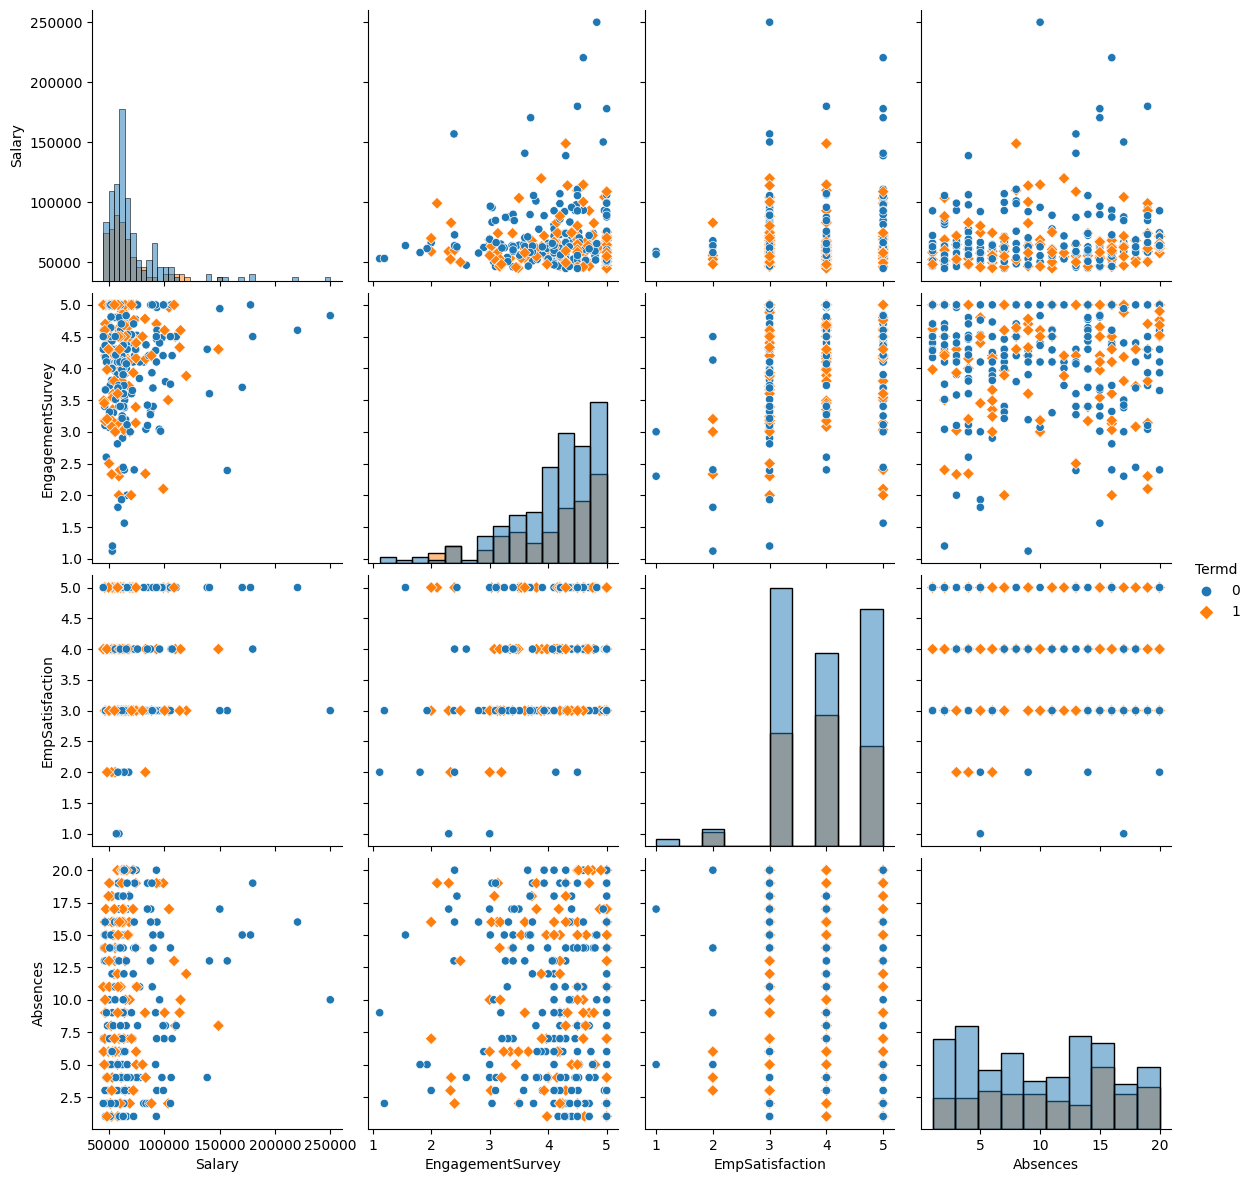

In [ ]:
#codde here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv', usecols = ['Salary', 'EngagementSurvey','EmpSatisfaction','Absences', 'Termd']) #Memilih kolom yang dibutuhkan

sns.pairplot(data=df[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', markers = ["o","D"] , height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
import numpy as np
import pandas as pd
import datetime

df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
DOB = df[['DOB']]
DOB_date = pd.to_datetime(DOB['DOB'])
DOB_date = np.where(DOB_date.dt.year > 2023, DOB_date - pd.offsets.DateOffset(years=100), DOB_date)
df['DOB_date'] = DOB_date

sekarang = datetime.datetime(2023,1,1)
now = pd.Timestamp(sekarang)
age = (sekarang-df['DOB_date']).astype('<m8[Y]')
df['Age'] = age
df[['DOB', 'DOB_date', 'Age']]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39.0
1,05/05/75,1975-05-05,47.0
2,09/19/88,1988-09-19,34.0
3,09/27/88,1988-09-27,34.0
4,09/08/89,1989-09-08,33.0
...,...,...,...
306,05/11/85,1985-05-11,37.0
307,05/04/82,1982-05-04,40.0
308,08/30/79,1979-08-30,43.0
309,02/24/79,1979-02-24,43.0


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
salary = df[['Salary']]

minmax_scaler = MinMaxScaler()
scaled_feature = minmax_scaler.fit_transform(salary.to_numpy())
df['Salary_minmax'] = scaled_feature
df[['Salary', 'Salary_minmax']]
#df.head(3)

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

#Sebelum diubah
import pandas as pd

df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                            object
DateofTerm

In [ ]:
from pandas.core.arrays import categorical
#Setelah diubah category
df[['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', \
    'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', \
    'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']] = df [['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', \
                                                                                   'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', \
                                                                                   'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']].astype('category')

df.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
from sklearn.preprocessing import LabelEncoder

#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
label_RecSource = LabelEncoder()
df['RecruitmentSource'] = label_RecSource.fit_transform(df['RecruitmentSource'])
#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
label_PerfScore = LabelEncoder()
df['PerformanceScore'] = label_PerfScore.fit_transform(df['PerformanceScore'])

df.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
data_y = df.Termd

#Independent Variable (feature)
data_x = df[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax', 'Absences',
             'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']].copy()

data_x.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39.0,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47.0,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34.0,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34.0,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33.0,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test =train_test_split(data_x, data_y, test_size=0.2, random_state = 42)

Accuracy   : 66.67%
Precision  : 53.85%
Recall     : 31.82%


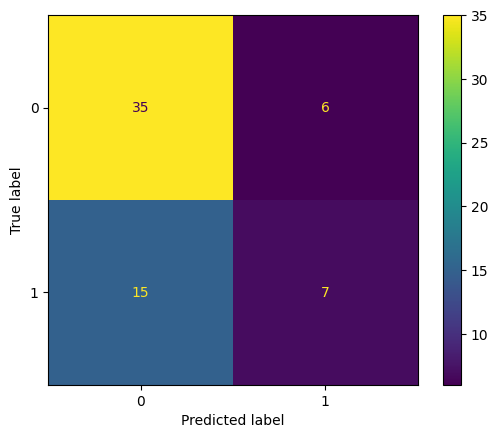

In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#Logistic Regression
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
train_model = model.fit(scaled_X_train, y_train)

y_pred = train_model.predict(scaled_X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy   : %.2f%%" % (accuracy * 100.0))
print("Precision  : %.2f%%" % (precision * 100.0))
print("Recall     : %.2f%%" % (recall * 100.0))

plt.show()

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

##NO 19
Menurut saya terdapat hubungan antara untuk siapa seseorang bekerja (manajernya) dan skor kinerjanya. Kita bisa melihat dari plot sudah dibuat dibawah ini

Untuk nilai performa Exceeds (melebihi) terdapat 37 karyawan yang memenuhi kriteria tersebut. Dan manager yang membawahi karyawan dengan nilai performa Exceeds terbanyak adalah Brannon Miller yang berarti karyawan dibawahi Brannon Miller banyak yang melebihi performa yang diinginkan. Selain itu, terdapat beberapa manager yang tidak memiliki karyawan dengan nilai performa Exceeds seperti Brandon R. Leblanc dan lain-lain.

Untuk nilai performa Fully Meets (sepenuhnya memenuhi) terdapat 243 karyawan yang memenuhi kriteria tersebut. Dan manager yang membawahi karyawan dengan nilai performa Fully Meets terbanyak adalah David Stanley yang berarti karyawan dibawahi David Stanley banyak yang sepenuhnya memenuhi performa.

Untuk nilai performa PIP (tidak memenuhi) terdapat 13 karyawan yang memenuhi kriteria tersebut. Dan manager yang membawahi karyawan dengan nilai performa PIP terbanyak adalah Brannon Miller yang berarti karyawan dibawahi Brannon Miller banyak yang tidak memenuhi ekspetasi. Selain itu, terdapat beberapa manager yang tidak memiliki karyawan dengan nilai performa PIP seperti Brandon R. Leblanc dan lain-lain.

Untuk nilai performa Needs Improvement (butuh improvisasi) terdapat 18 karyawan yang memenuhi kriteria tersebut. Dan manager yang membawahi karyawan dengan nilai performa Needs Improvement terbanyak adalah Michael Albert yang berarti banyak karyawan dibawahi Michael Albert yang butuh improvisasi. Selain itu terdapat beberapa manager yang tidak memiliki karyawan dengan nilai performa Needs Improvement seperti Brandon R. Leblanc dan lain-lain.

Jadi kesimpulannya, karyawan yang dibawahi Brannon Miller banyak yang melebihi performa tetapi banyak juga yang tidak memenuhi performa yang diinginkan. Selain itu, banyak karyawan yang sudah sepenuhnya memenuhi performa dan yang paling banyak adalah karyawan yang dibawahi oleh David Stanley. Dan untuk karyawan yang dibawahi oleh Michael Albert masih banyak yang memerlukan improvisasi.

Text(0.5, 1.0, 'Needs Improvement')

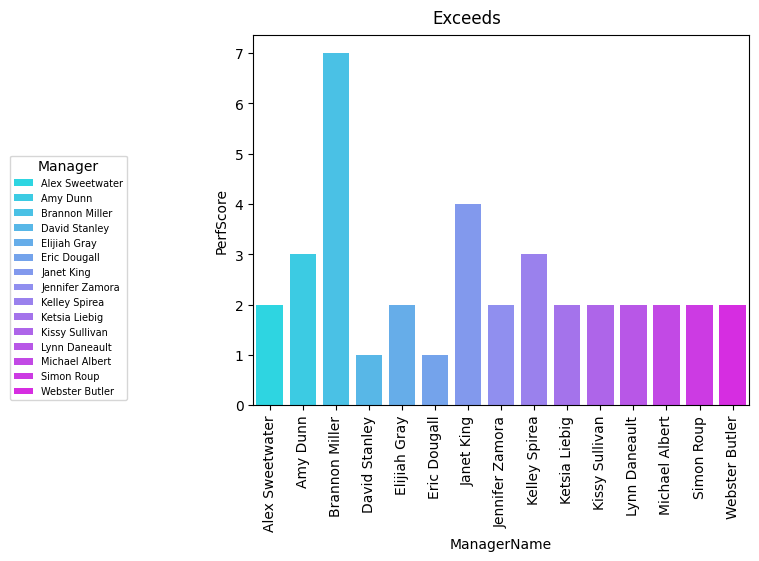

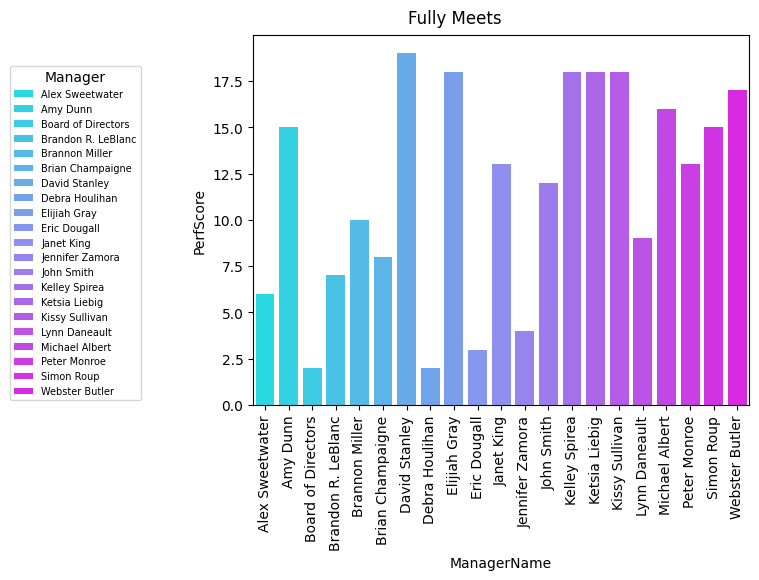

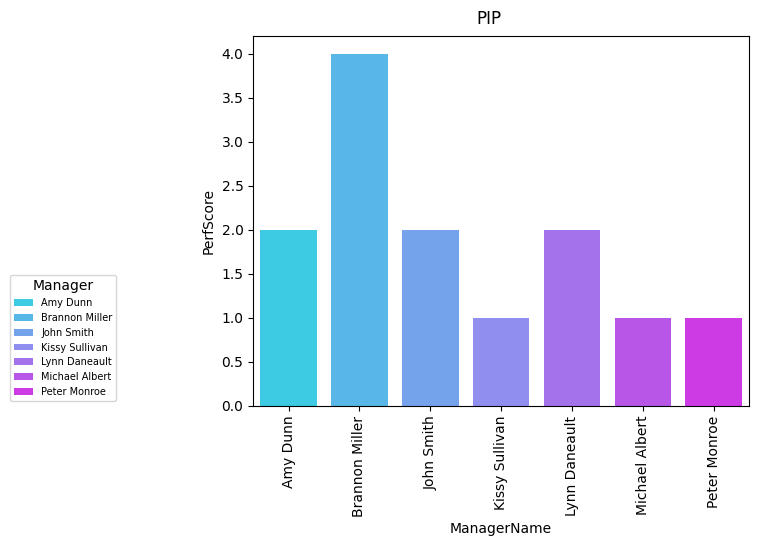

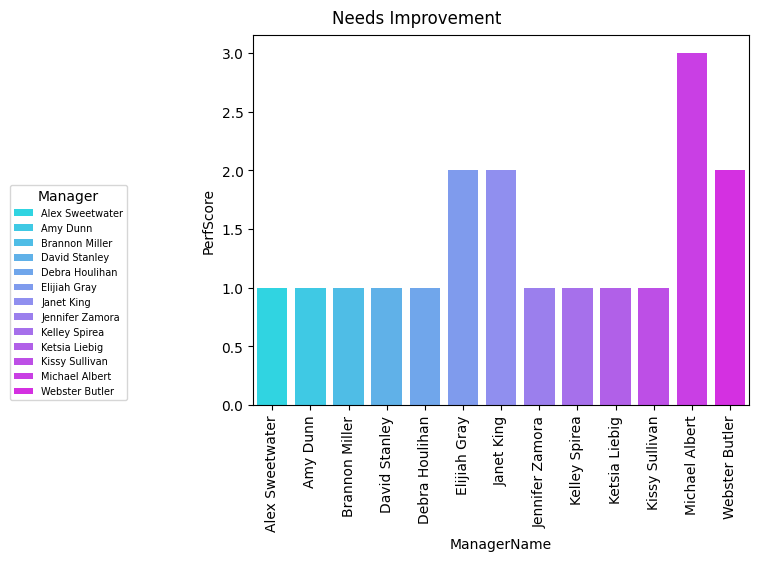

In [ ]:
#19
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
df = data[['Employee_Name', 'ManagerName', 'PerformanceScore']]

df1 = df.loc[df['PerformanceScore'] == "Exceeds"]
df2 = df.loc[df['PerformanceScore'] == "Fully Meets"]
df3 = df.loc[df['PerformanceScore'] == "PIP"]
df4 = df.loc[df['PerformanceScore'] == "Needs Improvement"]

dfExceeds = df1.groupby('ManagerName').agg(
    PerfScore = pd.NamedAgg('PerformanceScore', aggfunc = "count")
).reset_index()

dfFullyMeets = df2.groupby('ManagerName').agg(
    PerfScore = pd.NamedAgg('PerformanceScore', aggfunc = "count")
).reset_index()

dfPIP = df3.groupby('ManagerName').agg(
    PerfScore = pd.NamedAgg('PerformanceScore', aggfunc = "count")
).reset_index()

dfNeedsImprov = df4.groupby('ManagerName').agg(
    PerfScore = pd.NamedAgg('PerformanceScore', aggfunc = "count")
).reset_index()

#dfExceeds, dfFullyMeets, dfPIP, dfNeedsImprov
#Exceeds
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='ManagerName', y = 'PerfScore', hue = 'ManagerName', data = dfExceeds, palette='cool', dodge = False)
plt.legend( title="Manager", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('Exceeds', ha='right', va='bottom')

#Fully Meets
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='ManagerName', y = 'PerfScore', hue = 'ManagerName', data = dfFullyMeets, palette='cool', dodge = False)
plt.legend( title="Manager", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('Fully Meets', ha='right', va='bottom')

#PIP
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='ManagerName', y = 'PerfScore', hue = 'ManagerName', data = dfPIP, palette='cool', dodge = False)
plt.legend( title="Manager", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('PIP', ha='right', va='bottom')

#Needs Improvement
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='ManagerName', y = 'PerfScore', hue = 'ManagerName', data = dfNeedsImprov, palette='cool', dodge = False)
plt.legend( title="Manager", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('Needs Improvement', ha='right', va='bottom')

##No 20
Seperti yang kita bisa liat pada plot di bawah, kita bisa melihat bahwasanya jumlah karyawan yang masih memiliki hubungan kerja paling banyak berasal dari Indeed, sedangkan jumlah karyawan yang masih memiliki hubungan kerja paling sedikit berasal dari Other. Jadi, jika kita melihat dari jumlah karyawan yang masih memiliki hubungan kerja maka Indeed merupakan sumber perekrutan yang paling baik.

Text(0.5, 1.0, 'Putus Hubungan Kerja')

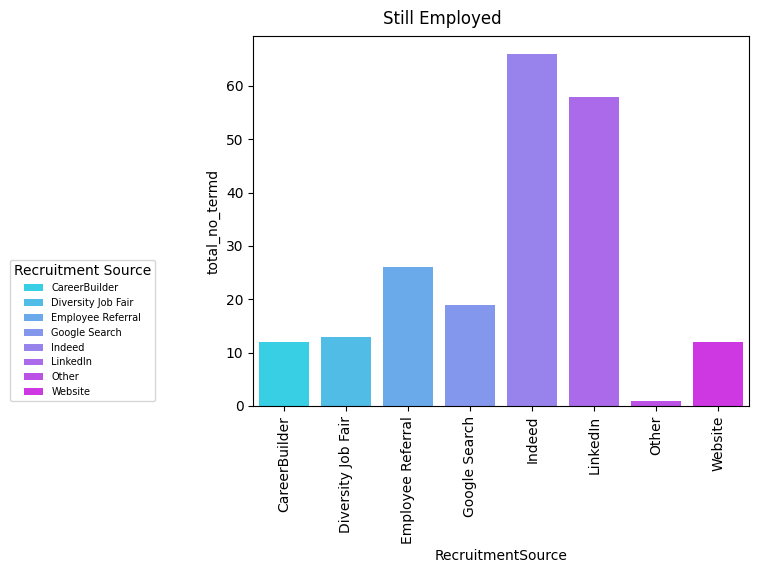

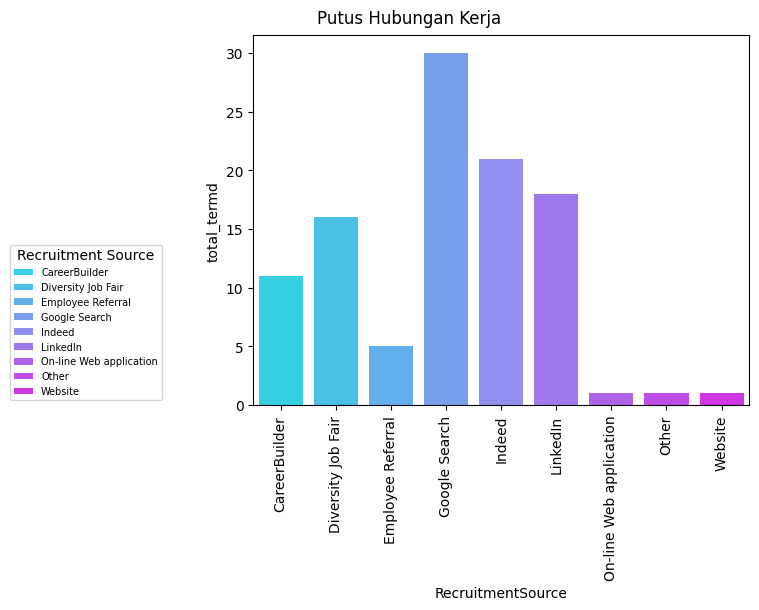

In [ ]:
#20
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
df = data[['RecruitmentSource', 'Termd']]

#Termd == 0 (Masih bekerja)
df1 = df.loc[df['Termd'] == 0]
dfNoTermd = df1.groupby('RecruitmentSource').agg(
    total_no_termd = pd.NamedAgg('Termd', aggfunc = "count")
).reset_index()

#Termd == 1 (Putus hubungan kerja)
df2 = df.loc[df['Termd'] == 1]
dfTermd = df2.groupby('RecruitmentSource').agg(
    total_termd = pd.NamedAgg('Termd', aggfunc = "count")
).reset_index()

#Still Employed
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='RecruitmentSource', y = 'total_no_termd', hue = 'RecruitmentSource', data = dfNoTermd, palette='cool', dodge = False)
plt.legend( title="Recruitment Source", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('Still Employed', ha='right', va='bottom')

#Putus hubungan kerja
f, ax = plt.subplots(1,1)
plt.xticks(rotation = 90)
ax = sns.barplot(x='RecruitmentSource', y = 'total_termd', hue = 'RecruitmentSource', data = dfTermd, palette='cool', dodge = False)
plt.legend( title="Recruitment Source", loc = "lower left", fontsize = "7", bbox_to_anchor=(-0.5, 0))
plt.title('Putus Hubungan Kerja', ha='right', va='bottom')